In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('framingham.csv')

In [3]:
dataframe.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
dataframe.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
dataframe = pd.read_csv('framingham.csv')

for i in range(len(dataframe.columns)):
    missing_data = dataframe[dataframe.columns[i]].isna().sum()
    perc = missing_data / len(dataframe) * 100
    print('>%d,  missing entries: %d, percentage %.2f' % (i, missing_data, perc))


>0,  missing entries: 0, percentage 0.00
>1,  missing entries: 0, percentage 0.00
>2,  missing entries: 105, percentage 2.48
>3,  missing entries: 0, percentage 0.00
>4,  missing entries: 29, percentage 0.68
>5,  missing entries: 53, percentage 1.25
>6,  missing entries: 0, percentage 0.00
>7,  missing entries: 0, percentage 0.00
>8,  missing entries: 0, percentage 0.00
>9,  missing entries: 50, percentage 1.18
>10,  missing entries: 0, percentage 0.00
>11,  missing entries: 0, percentage 0.00
>12,  missing entries: 19, percentage 0.45
>13,  missing entries: 1, percentage 0.02
>14,  missing entries: 388, percentage 9.16
>15,  missing entries: 0, percentage 0.00


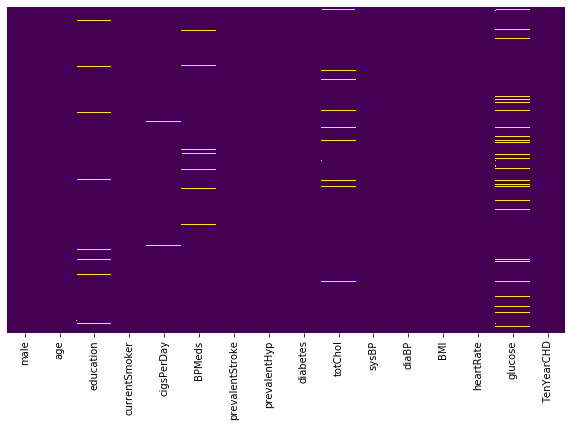

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataframe.isna(), cbar=False, cmap='viridis', yticklabels=False);

In [11]:
dataframe.shape

(4238, 16)

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(strategy='mean')

In [14]:
data = dataframe.values

In [15]:
X = data[:, :-1]
y = data[:, -1]

In [16]:
imputer.fit(X)

SimpleImputer()

In [17]:
X_trans = imputer.transform(X)

In [18]:
'Missing: {}'.format(sum(np.isnan(X).flatten()))

'Missing: 645'

In [19]:
'Missing: {}'.format(sum(np.isnan(X_trans).flatten()))

'Missing: 0'

# SimpleImputer and Model Evaluation

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [21]:
imputer = SimpleImputer(strategy='mean')

In [22]:
model = RandomForestClassifier()

In [23]:
pipeline = Pipeline([('impute', imputer), ('model', model)])

In [24]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [25]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

'Mean accuracy:{} std: {}'.format(round(np.mean(scores), 3), round(np.std(scores), 3))

'Mean accuracy:0.849 std: 0.006'

# Which Imputation Strategy is best?

In [26]:
results =[]

strategies = ['mean', 'median', 'most_frequent','constant']

for s in strategies:
    pipeline = Pipeline([('impute', SimpleImputer(strategy=s)),('model', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    results.append(scores)
    

In [40]:
for method, accuracy in zip(strategies, results):
    print('Method: {0}, mean accuracy: = {1:.3f}, max accuracy: {2:.3f}'.format(method, np.mean(accuracy), np.max(accuracy)))


Method: mean, mean accuracy: = 0.849, max accuracy: 0.858
Method: median, mean accuracy: = 0.848, max accuracy: 0.858
Method: most_frequent, mean accuracy: = 0.848, max accuracy: 0.861
Method: constant, mean accuracy: = 0.849, max accuracy: 0.868


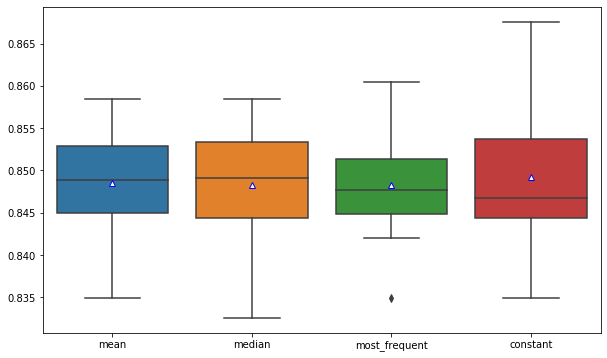

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(strategies, results, showmeans=True,
            meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})

# Make a new prediction

In [41]:
sample = X[0, :]

In [42]:
sample.shape

(15,)

In [43]:
sample = sample.reshape(-1, 15)

In [44]:
sample

array([[  1.  ,  39.  ,   4.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  , 195.  , 106.  ,  70.  ,  26.97,  80.  ,  77.  ]])

In [45]:
pipeline = Pipeline([('impute', SimpleImputer(strategy='constant')),('model', model)])

In [46]:
pipeline.fit(X, y)

Pipeline(steps=[('impute', SimpleImputer(strategy='constant')),
                ('model', RandomForestClassifier())])

In [47]:
pipeline.predict(sample)

array([0.])

In [48]:
y[0]

0.0